In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

Все данные для этого ноутбука - синтетические, поэтому могут не иметь сильной связи с реальностью. Цель данного ноутбука - показать, как можно использовать данные с камер, нацеленных на мусорные баки

Также, для упрощения прототипа мы:


*   предполагаем количество баков равное одному
*   оцениваем данные, приходящие с камер раз в час
*   не оцениваем риски связанные с неточностью определения баков нейросетью 

Конечно же в финальном продукте нужно будет оценивать данные для реальных условий



In [4]:
df = pd.read_excel('/content/drive/MyDrive/hackaton-trash/JP-notebooks/data.xlsx')

In [5]:
df.head()

,cam_id,time,cans_count,cans_full
0,1,2021-03-12 00:00:00,1,0
1,1,2021-03-12 01:00:00,1,0
2,1,2021-03-12 02:00:00,1,0
3,1,2021-03-12 03:00:00,1,0
4,1,2021-03-12 04:00:00,1,0


Определим, когда происходит вывоз мусора и заполнение баков.

-1 в столбце change означает вывоз мусора

1 в столбце change означает, что бак был заполнен

In [6]:
df['change'] = df['cans_full'].shift(1)
df['change'] = df['cans_full'] - df['change']
df['change'] = df['change'].fillna(0)

In [7]:
df[df['change']!=0]

,cam_id,time,cans_count,cans_full,change
13,1,2021-03-12 13:00:00,1,1,1.0
19,1,2021-03-12 19:00:00,1,0,-1.0
44,1,2021-03-13 20:00:00,1,1,1.0
55,1,2021-03-14 07:00:00,1,0,-1.0
71,1,2021-03-14 23:00:00,1,1,1.0
79,1,2021-03-15 07:00:00,1,0,-1.0
89,1,2021-03-15 17:00:00,1,1,1.0
105,1,2021-03-16 09:00:00,1,0,-1.0
129,1,2021-03-17 09:00:00,1,1,1.0
154,1,2021-03-18 10:00:00,1,0,-1.0


In [8]:
df_change = df[df['change']!=0].copy()

Благодаря этим данным мы можем получить:
1. График, показывающий когда подрядчик чаще всего вывозит мусор
2. Среднее время между наполнением контейнера и его вывозом
3. Среднее время заполнения бака после вывоза мусора
4. Попадает ли подрядчик в нормы вывоза мусора (СанПин)

### Определение самого популярного времени вывоза мусора

In [9]:
df_change['hour'] = df_change['time'].dt.hour

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


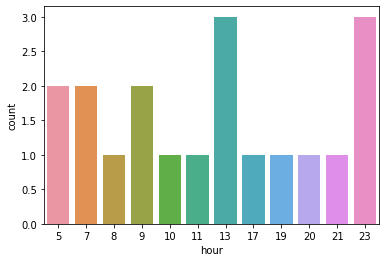

In [10]:
sns.countplot(df_change['hour'])


**По графику видно, что подрядчик чаще всего вывозит мусор около 13 дня и 23 вечера**

### Нахождение среднего времени заполнения бака и среднего времени, за которое мусор вывозится

In [11]:
df_change['last_time'] = df_change['time'].shift(1)
df_change['delta'] = df_change['time']-df_change['last_time']
df_change = df_change.dropna()

In [12]:
df_change

,cam_id,time,cans_count,cans_full,change,hour,last_time,delta
19,1,2021-03-12 19:00:00,1,0,-1.0,19,2021-03-12 13:00:00,0 days 06:00:00
44,1,2021-03-13 20:00:00,1,1,1.0,20,2021-03-12 19:00:00,1 days 01:00:00
55,1,2021-03-14 07:00:00,1,0,-1.0,7,2021-03-13 20:00:00,0 days 11:00:00
71,1,2021-03-14 23:00:00,1,1,1.0,23,2021-03-14 07:00:00,0 days 16:00:00
79,1,2021-03-15 07:00:00,1,0,-1.0,7,2021-03-14 23:00:00,0 days 08:00:00
89,1,2021-03-15 17:00:00,1,1,1.0,17,2021-03-15 07:00:00,0 days 10:00:00
105,1,2021-03-16 09:00:00,1,0,-1.0,9,2021-03-15 17:00:00,0 days 16:00:00
129,1,2021-03-17 09:00:00,1,1,1.0,9,2021-03-16 09:00:00,1 days 00:00:00
154,1,2021-03-18 10:00:00,1,0,-1.0,10,2021-03-17 09:00:00,1 days 01:00:00
165,1,2021-03-18 21:00:00,1,1,1.0,21,2021-03-18 10:00:00,0 days 11:00:00


In [13]:
df_change[df_change['change'] == 1].delta.mean()

Timedelta('0 days 16:06:40')

**Среднее время, за которое бак заполняется: ~16 часов**

In [14]:
df_change[df_change['change'] == -1].delta.mean()

Timedelta('0 days 11:40:00')

**Среднее время, которое бак стоит заполненным: ~12 часов**

### Определение попадания в нормы СанПина
Предложение: оценивать как часто подрядчик не вывозит мусор дольше суток

In [16]:
df_change[(df_change['change'] == -1) & (df_change['delta'] > pd.Timedelta(days=1))]

,cam_id,time,cans_count,cans_full,change,hour,last_time,delta
154,1,2021-03-18 10:00:00,1,0,-1.0,10,2021-03-17 09:00:00,1 days 01:00:00


**Видим, что подрядчик 18 марта не вывозил мусор в течение 25 часов**

!TODO: прикрутить зависимость промежутка, в течение которого подрядчик должен вывозить мусор согласно нормам СанПина. Для этого подключить датасет с температурой воздуха в Казани 